# 🧪 Big Data Challenge 4: Classification Challenge

Answer the following 7 tasks in this notebook.

## 1. Load and Preview the Dataset (Easy)

Load the dataset (e.g., `data.csv`) using pandas and display the first few rows.

**Expected Output:** Use `pd.read_csv()` and `.head()` to check data.

In [17]:
#import library pandas
import pandas as pd

#mengatur opsi agar Pandas menampilkan semua kolom tanpa ellipsis (...)
pd.set_option('display.max_columns', None)

#membaca file
file_path = '../data/data.csv'
df = pd.read_csv(file_path)

#membersihkan spasi di kolom
df.columns = df.columns.str.strip()

#5 baris pertama
print("ini 5 baris pertama dengan semua kolom terlihat:")
df.head()

ini 5 baris pertama dengan semua kolom terlihat:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Check Missing Values and Data Types (Easy)

Print out the number of missing values per column and data types.

**Hint:** Use `.info()` and `.isnull().sum()`.

In [18]:
# cek tipe data dan jumlah nilai non-null
df.info()


# cek jumlah nilai yang hilang per kolom
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
age               0
workclass         0
fnlwgt            0
education         0
education-num

* terdapat 32561 baris dan 15 kolom
* tidak ada data yang missing value

## 3. Data Preprocessing (Medium)

Fill missing values (e.g., median for age, mode for categorical columns), encode categorical variables using one-hot encoding or label encoding.

**Hint:** Use `pd.get_dummies()` or `LabelEncoder`.

In [19]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# mengisi Missing Values
# identifikasi kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# untuk kolom numerik, diisi median
for col in numerical_cols:
    if df[col].isnull().sum() > 0: 
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Missing values di kolom '{col}' diisi dengan median.")

# untuk kolom kategorikal, diisi mode 
for col in categorical_cols:
    if df[col].isnull().sum() > 0: 
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Missing values di kolom '{col}' diisi dengan mode.")

print("\nCek kembali missing values setelah pengisian:")
print(df.isnull().sum().sum()) 




Cek kembali missing values setelah pengisian:
0


In [20]:
#Encoding Variabel Kategorikal menggunakan One-Hot Encoding

# kolom 'income' adalah target variabel (label), jadi di-Label Encode
df['income'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# kolom kategorikal lainnya yang akan di-one-hot encode
cols_to_onehot = [col for col in categorical_cols if col != 'income']

# melakukan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cols_to_onehot, drop_first=True) # drop_first=True untuk menghindari dummy variable trap

print("\nBentuk DataFrame setelah One-Hot Encoding:")
print(df_encoded.shape) 
print("\nBeberapa baris pertama setelah One-Hot Encoding:")
print(df_encoded.head())


Bentuk DataFrame setelah One-Hot Encoding:
(32561, 101)

Beberapa baris pertama setelah One-Hot Encoding:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  workclass_ Federal-gov  workclass_ Local-gov  \
0       0                   False                 False   
1       0                   False                 False   
2       0                   False                 False   
3       0                   False                 False   
4       0                   False                 False   

   workclass_ Never-worked  workclass_ Private  workclass_ Self-emp-inc  \


* tidak ada baris yang menghilang
* jumlah kolom baru adalah 101 setelah proses one hot encoding
* income telah diubah menjadi 0 (untuk <=50K) atau 1 (untuk >50K). karena kolom ini adalah target variabel yang akan diprediksi oleh model.

In [ ]:
# melihat daftar kolom yang baru setelah encoding:
print("\nNama-nama kolom baru setelah One-Hot Encoding:")
print(df_encoded.columns.tolist())


Nama-nama kolom baru setelah One-Hot Encoding:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-man

In [26]:
# melihat distribusi kelas income
print("\nDistribusi Kelas Income:")
print(df_encoded['income'].value_counts())
print("\nProporsi Kelas Income:")
print(df_encoded['income'].value_counts(normalize=True) * 100)


Distribusi Kelas Income:
income
0    24720
1     7841
Name: count, dtype: int64

Proporsi Kelas Income:
income
0    75.919044
1    24.080956
Name: proportion, dtype: float64


* 76% income di 0, 24 persen income di 1, menunjukkan adanya kelas imbalance

## 4. Visualize Feature-Target Relationships (Medium)

Visualize relationship between key features and target variable using bar plots or box plots.

**Example:** Survival rate by gender or class if using Titanic-like data.

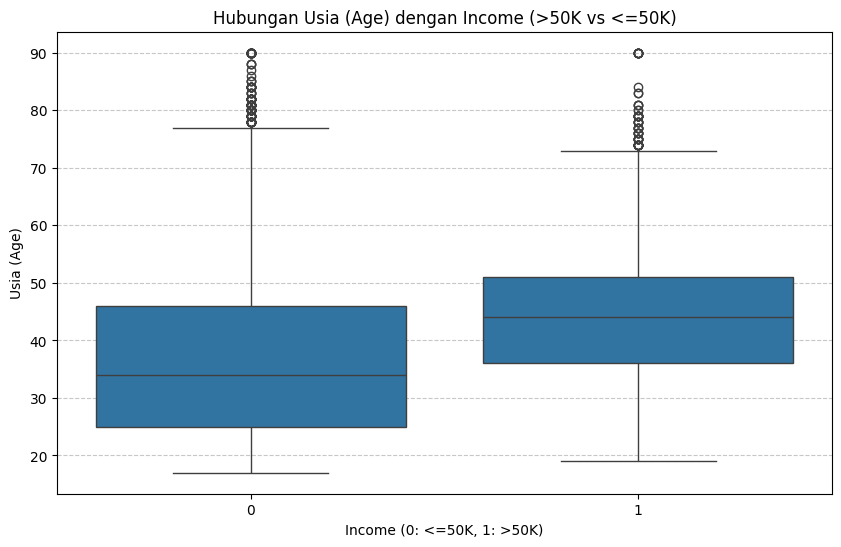


Interpretasi Box Plot Usia:
Ini menunjukkan distribusi usia untuk kedua kelompok income. Kita bisa lihat apakah orang berpenghasilan tinggi (>50K) cenderung lebih tua atau tidak.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. hubungan antara Usia (age) dan Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df_encoded)
plt.title('Hubungan Usia (Age) dengan Income (>50K vs <=50K)')
plt.xlabel('Income (0: <=50K, 1: >50K)')
plt.ylabel('Usia (Age)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("\nInterpretasi Box Plot Usia:")
print("Ini menunjukkan distribusi usia untuk kedua kelompok income. Kita bisa lihat apakah orang berpenghasilan tinggi (>50K) cenderung lebih tua atau tidak.")

* terlihat bahwa orang-orang dengan Income >50K (label 1) cenderung memiliki rentang usia yang lebih tinggi (median sekitar 45 tahun) dibandingkan dengan mereka yang Income <=50K (label 0, median sekitar 35 tahun). biasanya penghasilan meningkat seiring pengalaman dan usia.

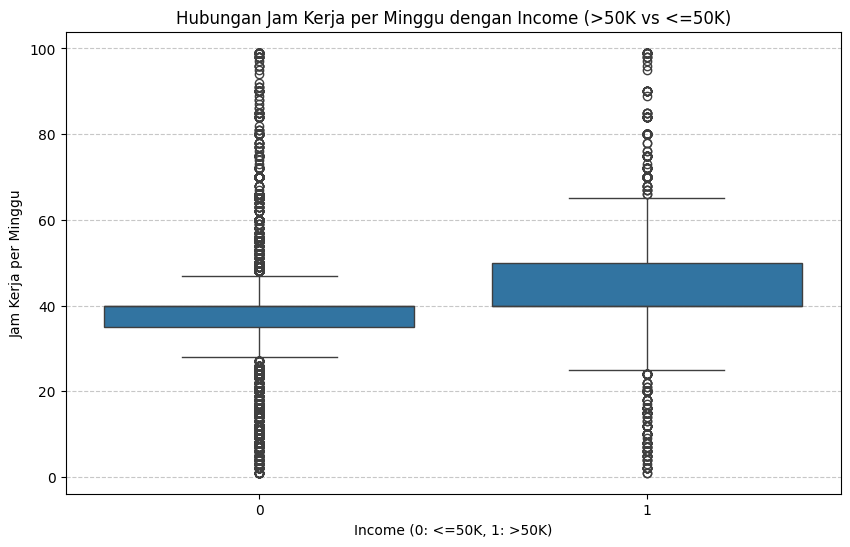


Interpretasi Box Plot Jam Kerja:
Ini menunjukkan distribusi jam kerja per minggu untuk kedua kelompok income. Kita bisa lihat apakah ada perbedaan jam kerja antara mereka yang berpenghasilan tinggi dan rendah.


In [29]:
# 2. hubungan antara Jam Kerja per Minggu (hours-per-week) dan Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df_encoded)
plt.title('Hubungan Jam Kerja per Minggu dengan Income (>50K vs <=50K)')
plt.xlabel('Income (0: <=50K, 1: >50K)')
plt.ylabel('Jam Kerja per Minggu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("\nInterpretasi Box Plot Jam Kerja:")
print("Ini menunjukkan distribusi jam kerja per minggu untuk kedua kelompok income. Kita bisa lihat apakah ada perbedaan jam kerja antara mereka yang berpenghasilan tinggi dan rendah.")



* orang dengan Income >50K (label 1) memiliki tingkat pendidikan numerik yang jauh lebih tinggi (median sekitar 12-13, yang berarti Bachelors atau Some-college ke atas) dibandingkan dengan mereka yang Income <=50K (median sekitar 9-10, yang berarti HS-grad atau Some-college).



C:\Users\kn409\AppData\Local\Temp\ipykernel_29880\245028755.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='sex_ Male', data=df_encoded, ci=None) # ci=None untuk menyembunyikan error bars


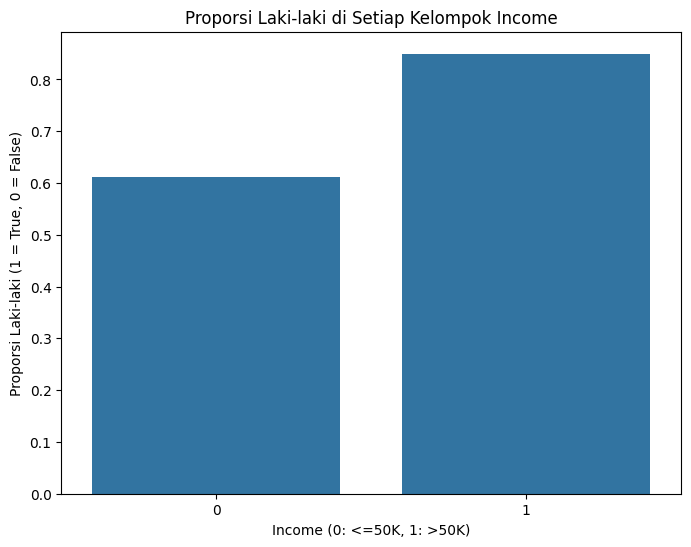


Interpretasi Bar Plot Jenis Kelamin:
Ini menunjukkan berapa proporsi laki-laki di antara mereka yang berpenghasilan <=50K dan >50K. Kita bisa lihat apakah ada dominasi gender di salah satu kelompok.


In [30]:
# 3. hubungan antara Jenis Kelamin (sex_ Male) dan Income
# Karena sex sudah di-one-hot encode, kita bisa melihat proporsi Male di setiap kelompok income
plt.figure(figsize=(8, 6))
sns.barplot(x='income', y='sex_ Male', data=df_encoded, ci=None) # ci=None untuk menyembunyikan error bars
plt.title('Proporsi Laki-laki di Setiap Kelompok Income')
plt.xlabel('Income (0: <=50K, 1: >50K)')
plt.ylabel('Proporsi Laki-laki (1 = True, 0 = False)')
plt.show()
print("\nInterpretasi Bar Plot Jenis Kelamin:")
print("Ini menunjukkan berapa proporsi laki-laki di antara mereka yang berpenghasilan <=50K dan >50K. Kita bisa lihat apakah ada dominasi gender di salah satu kelompok.")

* proporsi laki-laki di kelompok Income >50K (label 1) jauh lebih tinggi (sekitar 0.85 atau 85%) dibandingkan di kelompok Income <=50K (sekitar 0.6 atau 60%). ini mengindikasikan bahwa dalam dataset ini, laki-laki lebih cenderung memiliki penghasilan tinggi.



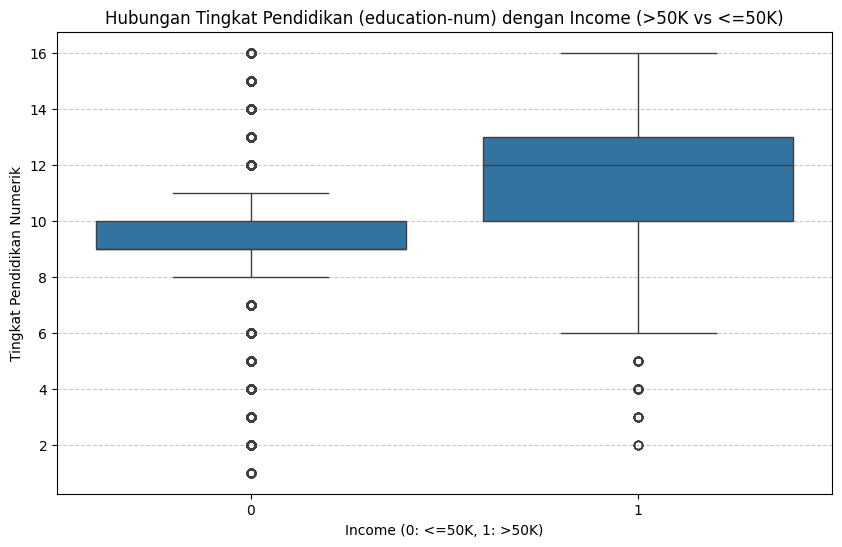


Interpretasi Box Plot Pendidikan:
Ini menunjukkan distribusi tingkat pendidikan numerik untuk kedua kelompok income. Semakin tinggi angkanya, semakin tinggi tingkat pendidikannya.


In [31]:
# 4. hubungan antara Pendidikan (education-num) dan Income
# education-num adalah representasi numerik dari level pendidikan
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education-num', data=df_encoded)
plt.title('Hubungan Tingkat Pendidikan (education-num) dengan Income (>50K vs <=50K)')
plt.xlabel('Income (0: <=50K, 1: >50K)')
plt.ylabel('Tingkat Pendidikan Numerik')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("\nInterpretasi Box Plot Pendidikan:")
print("Ini menunjukkan distribusi tingkat pendidikan numerik untuk kedua kelompok income. Semakin tinggi angkanya, semakin tinggi tingkat pendidikannya.")



* median jam kerja untuk Income >50K (label 1) sedikit lebih tinggi (sekitar 45-50 jam) dibandingkan dengan Income <=50K (sekitar 40 jam). Ini menunjukkan bahwa mereka yang berpenghasilan lebih tinggi cenderung bekerja lebih banyak jam per minggu.



C:\Users\kn409\AppData\Local\Temp\ipykernel_29880\3790534734.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='workclass_ Private', data=df_encoded, ci=None)


Text(0, 0.5, 'Proporsi')

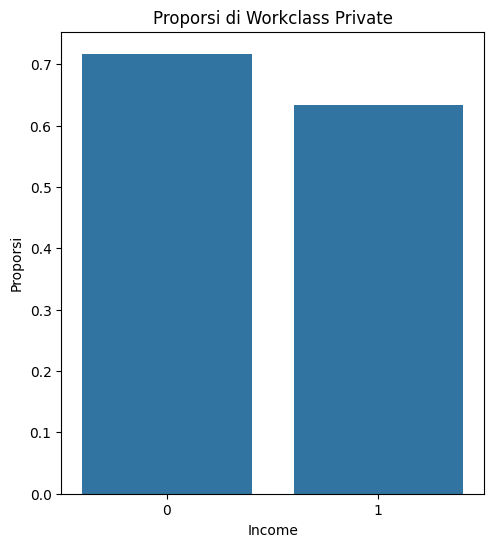

In [32]:
# 5. Hubungan antara Workclass tertentu dan Income
# Kita ambil contoh 'Private' dan 'Self-emp-not-inc'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 baris, 2 kolom, plot ke-1
sns.barplot(x='income', y='workclass_ Private', data=df_encoded, ci=None)
plt.title('Proporsi di Workclass Private')
plt.xlabel('Income')
plt.ylabel('Proporsi')



* proporsi orang di Workclass Private lebih tinggi di kelompok Income <=50K (sekitar 0.72) daripada di Income >50K (sekitar 0.63). Ini menunjukkan bahwa banyak orang di sektor swasta memiliki penghasilan menengah ke bawah di dataset ini.

C:\Users\kn409\AppData\Local\Temp\ipykernel_29880\311450889.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='workclass_ Self-emp-not-inc', data=df_encoded, ci=None)


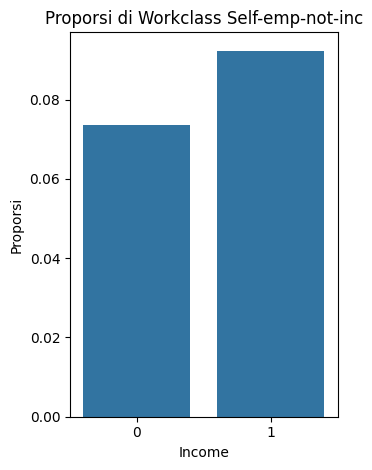


Interpretasi Bar Plot Workclass:
Ini menunjukkan proporsi individu di workclass 'Private' dan 'Self-emp-not-inc' untuk masing-masing kelompok income. Kita bisa melihat workclass mana yang lebih sering muncul di kelompok >50K.


In [33]:
plt.subplot(1, 2, 2) # 1 baris, 2 kolom, plot ke-2
sns.barplot(x='income', y='workclass_ Self-emp-not-inc', data=df_encoded, ci=None)
plt.title('Proporsi di Workclass Self-emp-not-inc')
plt.xlabel('Income')
plt.ylabel('Proporsi')
plt.tight_layout() # Merapikan layout
plt.show()
print("\nInterpretasi Bar Plot Workclass:")
print("Ini menunjukkan proporsi individu di workclass 'Private' dan 'Self-emp-not-inc' untuk masing-masing kelompok income. Kita bisa melihat workclass mana yang lebih sering muncul di kelompok >50K.")

* proporsi orang di Workclass Self-emp-not-inc (wiraswasta non-perusahaan) lebih tinggi di kelompok Income >50K (sekitar 0.085) daripada di Income <=50K (sekitar 0.075). Ini bisa mengindikasikan bahwa wiraswasta yang tidak masuk kategori perusahaan mungkin cenderung memiliki penghasilan tinggi.



## 5. Train-Test Split and Scaling (Medium)

Split the dataset into train and test sets, and apply feature scaling to numerical columns.

**Hint:** Use `train_test_split` and `StandardScaler`.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 

# memisahkan fitur (X) dan target (y)
# X adalah semua kolom kecuali 'income'
# y adalah kolom 'income'
X = df_encoded.drop('income', axis=1) # axis=1 berarti drop kolom
y = df_encoded['income']

# melakukan Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nBentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")


Bentuk X_train: (26048, 100)
Bentuk X_test: (6513, 100)
Bentuk y_train: (26048,)
Bentuk y_test: (6513,)


In [35]:
# mengidentifikasi kolom numerik (hanya pada X_train)
numerical_cols_for_scaling = X_train.select_dtypes(include=['int64', 'float64']).columns

# inisialisasi StandardScaler
scaler = StandardScaler()

# menerapkan scaling pada kolom numerik di training set
X_train[numerical_cols_for_scaling] = scaler.fit_transform(X_train[numerical_cols_for_scaling])

# menerapkan scaling pada kolom numerik di testing set
X_test[numerical_cols_for_scaling] = scaler.transform(X_test[numerical_cols_for_scaling])

print("\nBeberapa baris pertama X_train setelah scaling:")
print(X_train.head())


Beberapa baris pertama X_train setelah scaling:
            age    fnlwgt  education-num  capital-gain  capital-loss  \
5514  -0.408756  0.080051       1.133702     -0.145715     -0.217998   
19777 -0.188857 -0.981653       0.357049     -0.145715      4.457168   
10781  1.423734  0.126197      -1.972910     -0.145715     -0.217998   
32240 -1.288351 -0.090935       0.357049     -0.145715     -0.217998   
9876  -0.848554  0.856334      -0.031277     -0.145715     -0.217998   

       hours-per-week  workclass_ Federal-gov  workclass_ Local-gov  \
5514         0.779460                   False                  True   
19777        0.779460                   False                 False   
10781       -0.031510                   False                 False   
32240        0.455072                   False                 False   
9876        -0.031510                   False                 False   

       workclass_ Never-worked  workclass_ Private  workclass_ Self-emp-inc  \
5514        

In [38]:
from imblearn.over_sampling import SMOTE

print("\nMemeriksa kembali distribusi kelas di y_train sebelum balancing:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nDistribusi kelas di y_train setelah SMOTE:")
print(y_train_resampled.value_counts())


Memeriksa kembali distribusi kelas di y_train sebelum balancing:
income
0    19778
1     6270
Name: count, dtype: int64

Distribusi kelas di y_train setelah SMOTE:
income
1    19778
0    19778
Name: count, dtype: int64


* distribusi lebih seimbang

## 6. Train a Classification Model (Hard)

Train a classifier (e.g., Logistic Regression, RandomForestClassifier) on the training data.

**Evaluate:** Accuracy, precision, recall, and F1 score on test data.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# menggunakan Logistic Regression
logistic_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
# menggunakan 'liblinear' karena solver bagus untuk dataset kecil/menengah dan binary classification
# max_iter ditingkatkan untuk memastikan konvergensi

# melatih model menggunakan data training yang sudah di-resample
logistic_model.fit(X_train_resampled, y_train_resampled)

# melakukan prediksi pada data testing (yang TIDAK di-resample)
y_pred_logistic = logistic_model.predict(X_test)

# evaluasi performa Logistic Regression
print("\nEvaluasi Model: Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logistic):.4f}")
print("\nClassification Report untuk Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))


Evaluasi Model: Logistic Regression
Accuracy: 0.8194
Precision: 0.5935
Recall: 0.7982
F1-Score: 0.6808

Classification Report untuk Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      4942
           1       0.59      0.80      0.68      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.81      0.78      6513
weighted avg       0.85      0.82      0.83      6513



* Akurasi 81.94% berarti model ini secara keseluruhan benar dalam memprediksi sekitar 82% kasus di data test.

Kelas 0 (<=50K):

* Precision: 0.93 (Tinggi, Dari semua yang diprediksi model sebagai <=50K, 93% memang benar <=50K).

* Recall: 0.83 (Bagus, Dari semua yang sebenarnya <=50K, 83% berhasil diprediksi oleh model).

Kelas 1 (>50K):

* Precision: 0.59 (Agak rendah. Dari semua yang diprediksi model sebagai >50K, hanya 59% yang benar-benar >50K. Artinya, ada cukup banyak "false positives".

* Recall: 0.80 (Cukup tinggi. Dari semua yang sebenarnya >50K, 80% berhasil diprediksi oleh model.).

* F1-Score 0.68 untuk Kelas 1 menunjukkan keseimbangan antara precision dan recall pada kelas minoritas.

In [40]:
# menggunakan model RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# melatih model menggunakan data training yang sudah di-resample
random_forest_model.fit(X_train_resampled, y_train_resampled)

# melakukan prediksi pada data testing (yang TIDAK di-resample)
y_pred_rf = random_forest_model.predict(X_test)

# evaluasi performa RandomForestClassifier
print("\nEvaluasi Model: RandomForestClassifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report untuk RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))


Evaluasi Model: RandomForestClassifier
Accuracy: 0.8491
Precision: 0.6742
Recall: 0.7244
F1-Score: 0.6984

Classification Report untuk RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4942
           1       0.67      0.72      0.70      1571

    accuracy                           0.85      6513
   macro avg       0.79      0.81      0.80      6513
weighted avg       0.85      0.85      0.85      6513



* Akurasi 84.91% secara keseluruhan lebih tinggi dari Logistic Regression. Ini berarti Random Forest sedikit lebih baik dalam memprediksi secara keseluruhan.

Kelas 0 (<=50K):

* Precision: 0.91

* Recall: 0.89 (sangat bagus untuk kelas mayoritas)

Kelas 1 (>50K):

* Precision: 0.67 (Lebih baik dari Logistic Regression. Yang artinya lebih sedikit "false positives" ketika memprediksi >50K).

* Recall: 0.72 (Sedikit lebih rendah dari Logistic Regression, tapi masih bagus. Berarti model ini masih lumayan bisa dalam "menemukan" yang >50K).

* F1-Score 0.70 untuk Kelas 1 menunjukkan keseimbangan yang lebih baik antara precision dan recall dibandingkan Logistic Regression untuk kelas >50K.

## 7. Confusion Matrix and ROC Curve (Hard)

Plot a confusion matrix and ROC curve to evaluate model performance.

**Bonus:** Show AUC score and interpret the results.

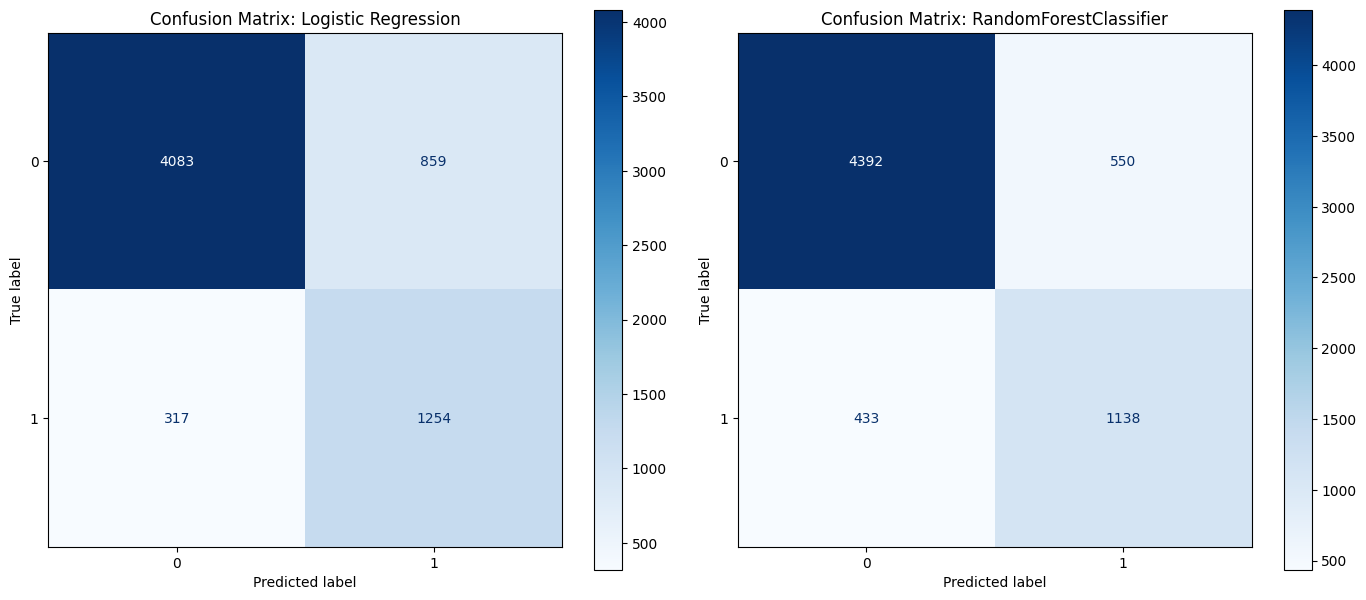

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

# Confusion Matrix 
plt.figure(figsize=(14, 6))

# Confusion Matrix untuk Logistic Regression
plt.subplot(1, 2, 1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic, cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Confusion Matrix: Logistic Regression')
plt.grid(False) 

# Confusion Matrix untuk RandomForestClassifier
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Confusion Matrix: RandomForestClassifier')
plt.grid(False) 

plt.tight_layout()
plt.show()

Untuk Logistic Regression:

True Negative (TN) [Prediksi 0, Aktual 0]: 4083
* Model benar memprediksi 4083 orang berpenghasilan <=50K.

False Positive (FP) [Prediksi 1, Aktual 0]: 859
* Model salah memprediksi 859 orang sebagai >50K padahal aslinya <=50K. cukup banyak "salah prediksi positif".

False Negative (FN) [Prediksi 0, Aktual 1]: 317
* Model salah memprediksi 317 orang sebagai <=50K padahal aslinya >50K. Ini adalah orang berpenghasilan tinggi yang tidak berhasil ditemukan model.

True Positive (TP) [Prediksi 1, Aktual 1]: 1254
* Model benar memprediksi 1254 orang berpenghasilan >50K. Ini adalah jumlah orang berpenghasilan tinggi yang berhasil ditemukan.

Untuk RandomForestClassifier:

True Negative (TN) [Prediksi 0, Aktual 0]: 4392
* Model Random Forest lebih baik dalam memprediksi kelas 0 (mayoritas).

False Positive (FP) [Prediksi 1, Aktual 0]: 550
* Random Forest memiliki lebih sedikit "salah prediksi positif" dibandingkan Logistic Regression (550 vs 859). Ini berarti Random Forest lebih presisi dalam prediksi >50K.

False Negative (FN) [Prediksi 0, Aktual 1]: 433
* Random Forest memiliki lebih banyak "salah prediksi negatif" dibandingkan Logistic Regression (433 vs 317). Ini berarti Random Forest kurang mampu "menemukan" semua orang berpenghasilan >50K dibandingkan Logistic Regression (Recall lebih rendah, seperti yang kita lihat di metrik sebelumnya).

True Positive (TP) [Prediksi 1, Aktual 1]: 1138
* Random Forest berhasil memprediksi 1138 orang berpenghasilan >50K. Ini lebih rendah dari Logistic Regression.

### Ringkasan Confusion Matrix:

* Random Forest: Lebih baik dalam mengidentifikasi negatif sejati (TN lebih tinggi) dan lebih rendah false positives (FP lebih rendah). Namun, sedikit lebih buruk dalam menemukan semua positif sejati (FN lebih tinggi, TP lebih rendah).

* Logistic Regression: Lebih banyak false positives, tapi sedikit lebih baik dalam "menangkap" semua true positives.

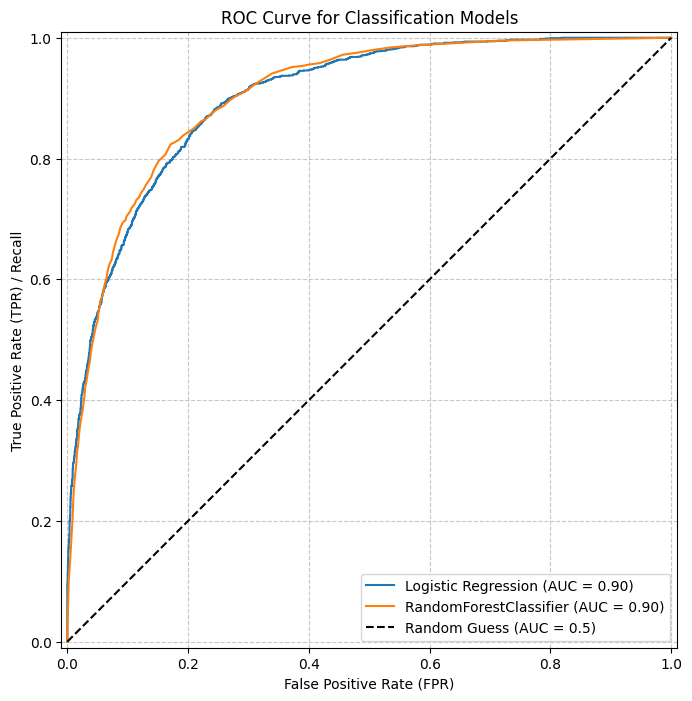

In [42]:
# ROC Curve dan AUC Score 
plt.figure(figsize=(10, 8))

# ROC Curve untuk Logistic Regression
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
roc_display_logistic = RocCurveDisplay.from_predictions(y_test, y_prob_logistic, name='Logistic Regression', ax=plt.gca())
auc_logistic = roc_auc_score(y_test, y_prob_logistic)

# ROC Curve untuk RandomForestClassifier
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]
roc_display_rf = RocCurveDisplay.from_predictions(y_test, y_prob_rf, name='RandomForestClassifier', ax=plt.gca())
auc_rf = roc_auc_score(y_test, y_prob_rf)


plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)') # Garis diagonal untuk referensi
plt.title('ROC Curve for Classification Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

* Kedua kurva (biru untuk Logistic Regression dan oranye untuk Random Forest) terlihat sangat bagus, jauh di atas garis acak (Random Guess - garis putus-putus hitam). Ini menunjukkan bahwa kedua model memiliki kemampuan yang sangat baik dalam membedakan antara orang berpenghasilan <=50K dan >50K.

* Kurva Random Forest (oranye) sedikit lebih tinggi dan lebih dekat ke pojok kiri atas dibandingkan kurva Logistic Regression (biru). Ini secara visual mengkonfirmasi bahwa RandomForestClassifier sedikit lebih baik dalam performa diskriminasi keseluruhannya.

In [43]:
print("\nAUC Scores")
print(f"AUC Score untuk Logistic Regression: {auc_logistic:.4f}")
print(f"AUC Score untuk RandomForestClassifier: {auc_rf:.4f}")


AUC Scores
AUC Score untuk Logistic Regression: 0.9015
AUC Score untuk RandomForestClassifier: 0.9040


* Nilai AUC yang sangat tinggi untuk kedua model (sekitar 0.90) adalah indikator kinerja yang luar biasa. Angka 0.90 berarti model memiliki kemampuan diskriminasi yang sangat kuat; ada peluang 90% bahwa model akan memberikan peringkat lebih tinggi pada instance positif acak daripada instance negatif acak.

* RandomForestClassifier (0.9040) memiliki AUC yang sedikit lebih tinggi daripada Logistic Regression (0.9015), sekali lagi menegaskan bahwa Random Forest adalah pemenang tipis dalam kemampuan pembeda ini.

### Kesimpulan dan Perbandingan Model:
* Secara Accuracy keseluruhan, RandomForestClassifier lebih unggul (84.91% vs 81.94%).

* Untuk Kelas 0 (<=50K), kedua model performanya sangat baik, dengan Random Forest sedikit lebih baik di Recall.

* Untuk Kelas 1 (>50K) (kelas minoritas yang penting), RandomForestClassifier memiliki Precision dan F1-Score yang lebih baik. Walaupun Recall-nya sedikit lebih rendah dari Logistic Regression, nilai F1-Score yang lebih tinggi menunjukkan bahwa Random Forest mencapai keseimbangan yang lebih baik antara memprediksi >50K dengan benar (recall) dan memastikan bahwa prediksi >50K tersebut benar-benar akurat (precision).

Secara keseluruhan, RandomForestClassifier menunjukkan performa yang sedikit lebih superior dibandingkan Logistic Regression, baik dari akurasi, F1-Score pada kelas minoritas, dan AUC Score. Ini menunjukkan bahwa Random Forest lebih baik dalam menyeimbangkan Precision dan Recall, serta memiliki kemampuan diskriminasi yang lebih kuat.
